# App Review Sentiment Analysis

By : ***Pradeep Verma***

App Reviews Sentiment Analysis means **evaluating** and **understanding the sentiments** expressed <br>in user reviews of mobile applications (apps). It involves using data analysis techniques to determine whether <br> the sentiments in these reviews are positive, negative, or neutral.

### Process We Can Follow

1) The first step is to gather a dataset of app reviews.
2) Then, perform EDA by analyzing the length of the reviews and their ratings, etc.
3) Then, label the sentiment data using tools like Textblob or NLTK.
4) Understand the overall distribution of sentiments (positive, negative, neutral) in the dataset.
5) Explore the relationship between the sentiments and the ratings given.
6) Analyze the text of the reviews to identify common themes or words in different sentiment categories.

### Importing the libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
linkedin_data = pd.read_csv("linkedin-reviews.csv")

In [4]:
# Display the first few rows of the dataset
print(linkedin_data.head())

                                              Review  Rating
0  Does absolutely nothing for a LinkedIn beginne...       1
1                            Force close(galaxy tab)       1
2  Slow and it tries to upload your contacts with...       1
3  Add ability to customize the profile and move ...       4
4  Good app, but it's a pain that it's not possib...       4


The dataset contains two columns: Review and Rating. <br>
The Review column consists of textual reviews, and the Rating column contains corresponding numerical ratings.

### Information about the data

In [5]:
linkedin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


### Checking for null values

In [6]:
linkedin_data.isnull().any()

Review    False
Rating    False
dtype: bool

The dataset contains 0 null values which is good

### Exploratory Data Analysis

#### Distribution of ratings

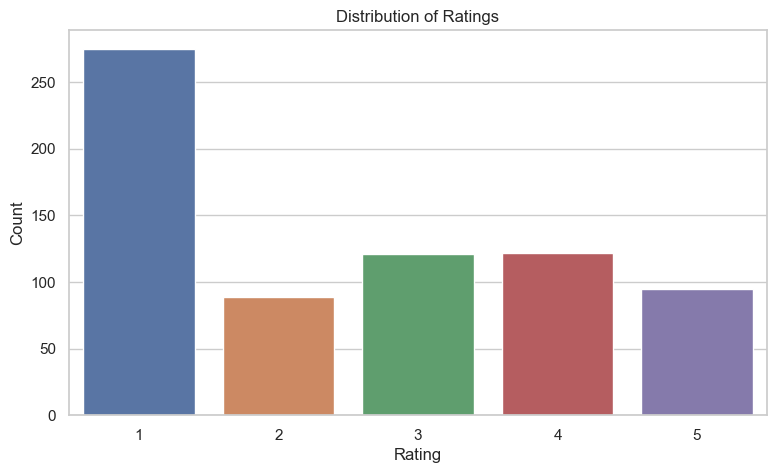

In [7]:
# Plotting the distribution of ratings
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=linkedin_data, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Here’s the distribution of ratings from the LinkedIn reviews dataset.<br> 
As you can see, it gives a clear picture of how many reviews fall into each rating category (from 1 to 5).

#### Length of each review

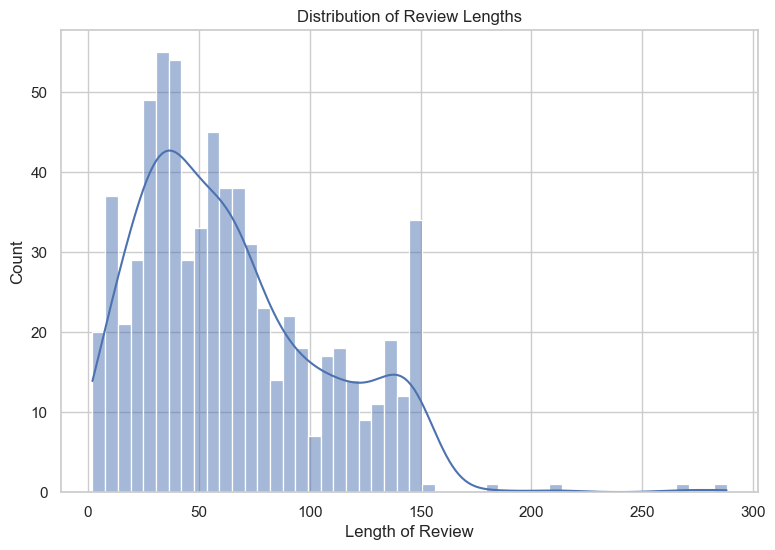

In [8]:
# Calculating the length of each review
linkedin_data['Review Length'] = linkedin_data['Review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(linkedin_data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

### Adding Sentiment Labels in the Data

TextBlob provides a polarity score ranging from -1 (very negative) to 1 (very positive) for a given text.<br>
We can use this score to classify each review’s sentiment as **positive, neutral, or negative**.

In [9]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [10]:
# Applying TextBlob sentiment analysis to the reviews
linkedin_data['Sentiment'] = linkedin_data['Review'].apply(textblob_sentiment_analysis)


In [12]:
# Displaying the first few rows with the sentiment
linkedin_data.head()

,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


The dataset now includes sentiment labels for each review, classified as **Positive, Negative, or Neutral** based on the polarity score calculated by TextBlob.

### Analyzing App Reviews Sentiments

### Distribution of sentiments

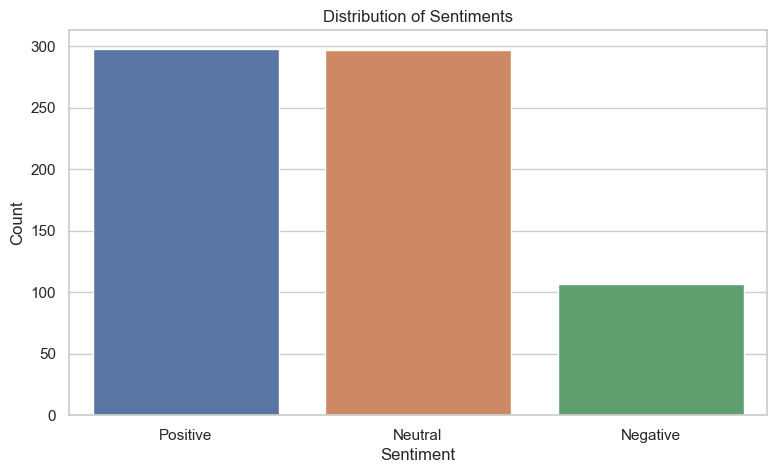

In [13]:
# Analyzing the distribution of sentiments
sentiment_distribution = linkedin_data['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

So, we can see although the app has low ratings, still the reviewers don’t use many negative words in the reviews for the app.

### Relationship between the sentiments and the ratings

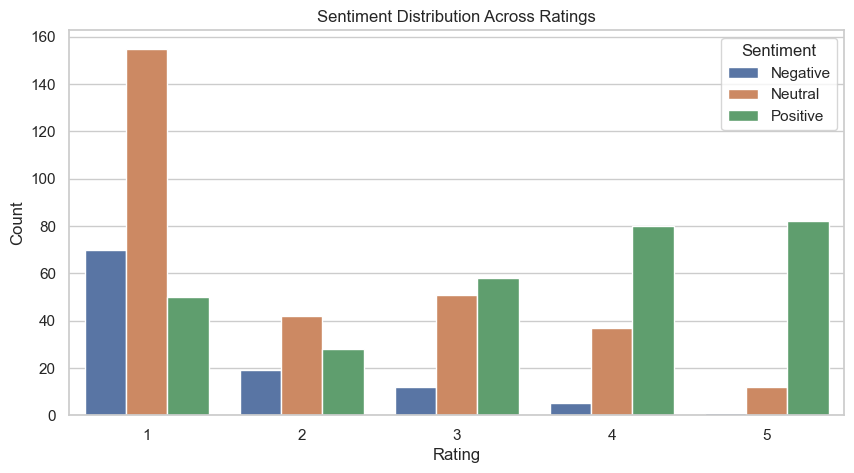

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=linkedin_data, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

### Text analysis

In [15]:
from wordcloud import WordCloud

In [16]:
# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_data[linkedin_data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

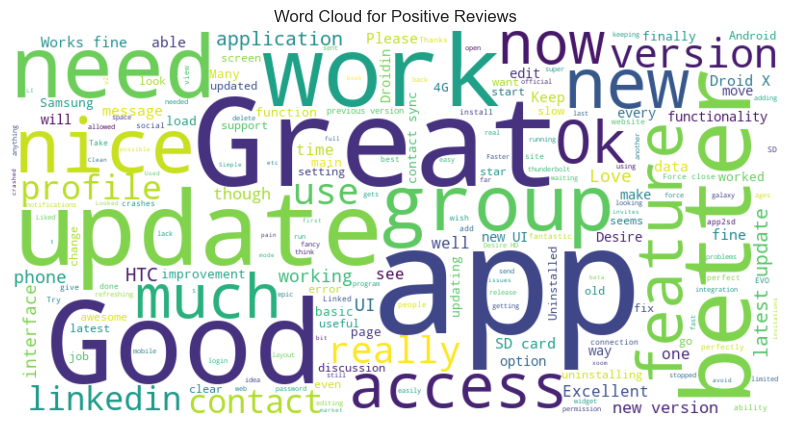

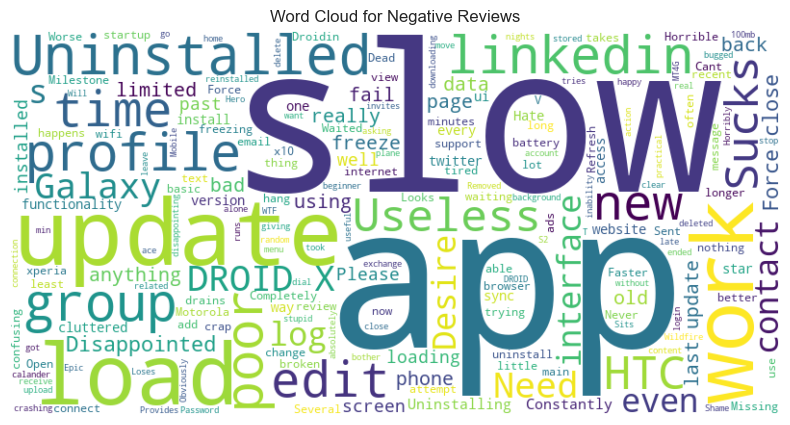

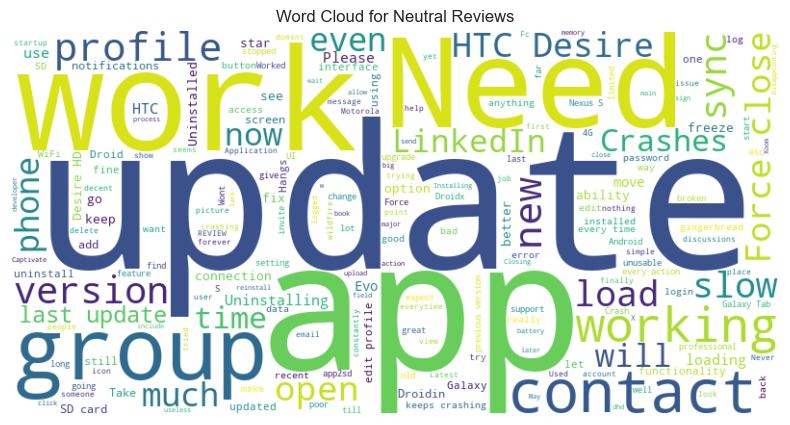

In [17]:
# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)